In [65]:
import requests
import pandas as pd

geoapify_key = "ba85a93e0db14167ada7e83d81a7e7bf"

In [66]:
# List of all U.S. states
states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]

state_coords = {}

In [67]:
# To get coordinates for a state
def get_coordinates(state):
    url = f"https://api.geoapify.com/v1/geocode/search?text={state}, United States&apiKey={geoapify_key}"
    response = requests.get(url)
    data = response.json()
    
def get_coordinates(state):
    url = f"https://api.geoapify.com/v1/geocode/search?text={state}, United States&apiKey={geoapify_key}"
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200 and data['features']:
        
        coords = data['features'][0]['geometry']['coordinates']
        return coords[1], coords[0]  
    else:
        print(f"Coordinates for {state} not found.")
        return None, None

In [68]:
# Loop through states and get coordinates
for state in states:
    lat, lon = get_coordinates(state)
    if lat and lon:
        state_coords[state] = [lat, lon]
        print(f"{state}: {lat}, {lon}")

Alabama: 33.2588817, -86.8295337
Alaska: 64.4459613, -149.680909
Arizona: 34.395342, -111.763275
Arkansas: 35.2048883, -92.4479108
California: 36.7014631, -118.755997
Colorado: 38.7251776, -105.607716
Connecticut: 41.6500201, -72.7342163
Delaware: 38.6920451, -75.4013315
Florida: 27.7567667, -81.4639835
Georgia: 32.3293809, -83.1137366
Hawaii: 19.593801499999998, -155.42837009716908
Idaho: 43.6447642, -114.015407
Illinois: 40.0796606, -89.4337288
Indiana: 40.3270127, -86.1746933
Iowa: 41.9216734, -93.3122705
Kansas: 38.27312, -98.5821872
Kentucky: 37.5726028, -85.1551411
Louisiana: 30.8703881, -92.007126
Maine: 45.709097, -68.8590201
Maryland: 39.5162401, -76.9382069
Massachusetts: 42.3788774, -72.032366
Michigan: 43.6211955, -84.6824346
Minnesota: 45.9896587, -94.6113288
Mississippi: 32.9715285, -89.7348497
Missouri: 38.7604815, -92.5617875
Montana: 47.3752671, -109.638757
Nebraska: 41.7370229, -99.5873816
Nevada: 39.5158825, -116.853722
New Hampshire: 43.4849133, -71.6553992
New Jers

In [69]:
# Convert to DataFrame for easier manipulation
state_coords_df = pd.DataFrame.from_dict(state_coords, orient='index', columns=['Latitude', 'Longitude'])
state_coords_df = state_coords_df.reset_index().rename(columns={'index': 'State'})

In [70]:
# Saved coordinates to a CSV file
state_coords_df.to_csv('/Users/latifahjones/Desktop/Project-3/Sorted_Tables/state_coordinates.csv', index=False)

# Display the DataFrame
state_coords_df.head()

,State,Latitude,Longitude
0,Alabama,33.258882,-86.829534
1,Alaska,64.445961,-149.680909
2,Arizona,34.395342,-111.763275
3,Arkansas,35.204888,-92.447911
4,California,36.701463,-118.755997


In [71]:
import pandas as pd
#Loading state coordinates 
coords_df = pd.read_csv('/Users/latifahjones/Desktop/Project-3/Sorted_Tables/state_coordinates.csv')

# Loading state industry demand data
demand_df = pd.read_csv('/Users/latifahjones/Desktop/Project-3/Sorted_Tables/Industry_Demand_per_state.csv')

In [72]:
# Finding the top 3 industries for each state
top_industries = demand_df.set_index('State').apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Creating a new DataFrame with states and their top 3 industries
top_industries_df = pd.DataFrame(top_industries, columns=['Top_Industries'])
top_industries_df = top_industries_df.reset_index()

map_data = pd.merge(coords_df, top_industries_df, on='State')
map_data.head()


,State,Latitude,Longitude,Top_Industries
0,Alabama,33.258882,-86.829534,"[Trade, transportation, and utilities, Governm..."
1,Alaska,64.445961,-149.680909,"[Government, Trade, transportation, and utilit..."
2,Arizona,34.395342,-111.763275,"[Trade, transportation, and utilities, Educati..."
3,Arkansas,35.204888,-92.447911,"[Trade, transportation, and utilities, Educati..."
4,California,36.701463,-118.755997,"[Education and health services, Trade, transpo..."


In [76]:
import folium
import random

# List of colors to choose from for markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige',
          'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 
          'lightgreen', 'gray', 'black', 'lightgray']

# Created a base map centered on the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

for idx, row in map_data.iterrows():
    color = random.choice(colors)  # Choose a random color for each marker
    
    popup_text = f"""
    <h4 style="margin:0">{row['State']}</h4>
    <p style="margin:0"><strong>Top Industries:</strong></p>
    <ul style="padding-left: 1em; margin:0">
        <li>{row['Top_Industries'][0]}</li>
        <li>{row['Top_Industries'][1]}</li>
        <li>{row['Top_Industries'][2]}</li>
    </ul>
    """
    
    tooltip_text = f"Click for {row['State']}'s top 3 industries"
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=tooltip_text,
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m


In [78]:
m.save('/Users/latifahjones/Desktop/Project-3/industry_in_demand_by_state.html')
print("Map saved as 'industry_in_demand_by_state.html'")

Map saved as 'industry_in_demand_by_state.html'


In [36]:
import pandas as pd
import plotly.express as px
import numpy as np

In [24]:
df['Absolute_Growth'] = df['Projected 2033 Employment'] - df['2023 Employment']

df['Growth_Rate'] = ((df['Projected 2033 Employment'] - df['2023 Employment']) / df['2023 Employment']) * 100

df.head()

,Industry Title,Industry Code,Industry Type,2023 Employment,2023 Percent of Occupation,2023 Percent of Industry,Projected 2033 Employment,Projected 2033 Percent of Occupation,Projected 2033 Percent of Industry,"Employment Change, 2023-2033","Employment Percent Change, 2023-2033",Industry Sort,Display Level,Absolute_Growth,Growth_Rate
0,Total employment,TE1000,Summary,167849.8,100.0,100,174589.0,100.0,100,6739.2,4.0,NaN,0,6739.2,4.015018
1,Self-employed workers,TE1100,Line Item,9708.9,5.8,100,9828.8,5.6,100,119.9,1.2,2.0,1,119.9,1.234949
2,Total wage and salary employment,TE1200,Summary,158140.9,94.2,100,164760.3,94.4,100,6619.3,4.2,3.0,1,6619.4,4.185761
3,"Agriculture, forestry, fishing and hunting",110000,Summary,1461.8,0.9,100,1473.0,0.8,100,11.2,0.8,4.0,2,11.2,0.766179
4,Crop production,111000,Line Item,849.3,0.5,100,874.4,0.5,100,25.1,3.0,5.0,3,25.1,2.955375


In [38]:
#Loading csv
file_path = '/Users/latifahjones/Desktop/Project-3/Database/US_industry_demand_breakdown.csv'
df = pd.read_csv(file_path)

df['Absolute_Growth'] = df['Projected 2033 Employment'] - df['2023 Employment']
df['Growth_Rate'] = ((df['Projected 2033 Employment'] - df['2023 Employment']) / df['2023 Employment']) * 100

In [40]:
top_industries = df.nlargest(10, 'Growth_Rate')

In [48]:
plot_data = []
for _, row in top_industries.iterrows():
    industry = row['Industry Title'] 
    initial_employment = row['2023 Employment']
    growth_rate = row['Growth_Rate'] / 100  
    years = np.arange(2023, 2033)
    
    employment_values = [initial_employment * ((1 + growth_rate) ** (year - 2023)) for year in years]
    
    for year, employment in zip(years, employment_values):
        plot_data.append({'Industry Title': industry, 'Year': year, 'Employment': employment})

In [50]:
# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

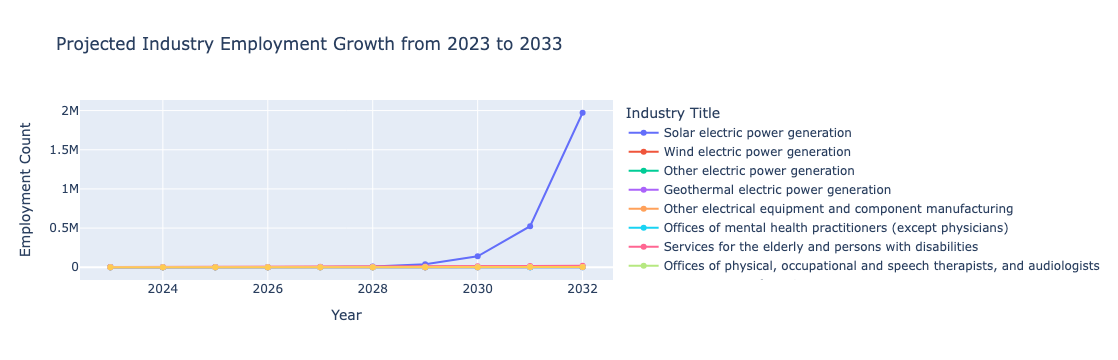

In [58]:
fig = px.line(plot_df, x='Year', y='Employment', color='Industry Title',
              title='Projected Industry Employment Growth from 2023 to 2033',
              labels={'Employment': 'Employment Count', 'Year': 'Year', 'Industry Title': 'Industry Title'},
              markers=True)

output_path = '/Users/latifahjones/Desktop/Project-3/Projected_Industry_Employment_Growth.html'
fig.write_html(output_path)

fig.show()